# Week 5 Intro

Let's preview a process that we're going to learn more about later this week. The process is called Markov chain Monte Carlo. And you know from the reading that this is a statistical search process that can provide valuable information for decision making.

So what I've done here is I've gone to a website that was created by Paul Lewis, who's a biologist at University of Connecticut-- my Alma mater. And Paul Lewis's team has actually made this website, as well as an app for the iPhone and iPad. You might want to try downloading the app, it's a little bit of fun to play with.

So you got to use your imagination here because this is pretty much a bare bones simulation. But think of these two rings like a topographic map of a hill, or maybe a mesa would be a better idea, because this top part is considered to be flat. This is the top of the hill. This is the highest altitude area. And then around here, this is the slope that leads up to the top of the hill.

So this is an upward area where it's all upslope that's leading to the top of the hill. And then outside there is the plains, that's where it's all flat. Now it's the job of the robot-- you didn't know there was a robot in this, but there's a robot-- it's the job of a robot to start somewhere out on the plains here and then take steps at random.

And the goal of those steps is for the robot to move to higher ground and stay there. And so every time the robot takes a step, that step is evaluated statistically to see if it's an improvement. In other words, has it gone to a higher altitude? So after each step, the robot evaluates where it stands with respect to its previous position. And if it's a good step, if it leads to a higher altitude, it's kept.

Steps that are leading downhill are not favored, but they can be occasionally taken. And the reason for that is that we're searching for a global maximum, not a local maximum. And if you've ever been hiking, you know that sometimes you need to go downhill a little bit to get to the top of the mountain. So I've done my settings here. There's a few things that you can tweak. We can talk about those in a little while.

And the robot is going to start probably somewhere around here. And we're going to get an illustration of each of 1,000 steps. Now I know you're waiting in anticipation for something to actually happen. I'm going to run it now, and all of the steps will be displayed all at once because the process works very quickly.

All right. So you can see what's happened here. I actually clicked it twice. Let me clear it and do it again. There's the robot's starting point, that blue dot. I'm going to click Run, once this time. And there we go. So what's happened is the robot started out in the plains and it wandered around awhile in the plains until it came to the foothills.

And then it started to make progress around the foothills. There was, occasionally, an excursion back out into the plains, because there is a bit of randomness to this process. But eventually, the robot found the top, the mesa, the peak of the hill, which is this big, flat space. And you can just tell by the density of all of these blue marks here that the robot spent a lot of time wandering around on the top of this hill.

Now let me change some of the parameters here so that you can see one other thing of interest. Down here at the bottom, you see 1,000 metropolis steps taken and that's because I wanted there to be a nice, dense area of blue in the middle of the hill at the top there. But I'm going to do something now, I'm going to reduce the number of steps to 100. And I'm also going to show fails instead of hiding them.

And now I will clear to get a fresh start. Now here goes the robot on 100 steps trying to find the peak of the hill. But this time, we'll also see the mistakes that the robot makes. In other words, the steps that it backs out of. So we get the same result in miniature this time. The robot spends a little bit of time out in the plains, but quickly finds the foothills, and then eventually spends a lot of time walking around on top of the hill.

Now at various points in its trajectory, it took small steps or large steps in the wrong direction and these were rejected. So you can see one here, which was a really big step out of the foothills and onto the plains. And that definitely led downhill. I'm sorry-- that came out of the peak right down onto the plains.

And that was definitely rejected because it was completely in the wrong direction. So a little bit of a bare bones thing, but it illustrates a really important statistical process known as Markov chain Monte Carlo. And that's the process that's used within the Bayesian statistics that we'll be using this week and for the rest of the semester.

# 5.2: Confidence Intervals in Context

** Cannot prove anything using a sample or statistical inference.

# 5.3: Bayesian Thinking about Data

In [30]:
type <- c('Jelly','Butter')
down <- c(2,3)
up <- c(1,4)
pbj <- data.frame(down, up)
rownames(pbj) <- type
pbj

,down,up
,<dbl>,<dbl>
Jelly,2,1
Butter,3,4


In [31]:
type <- c('Jelly','Butter', 'Marginal')
down <- c(.2,.3, .5)
up <- c(.1,.4, .5)
Marginal <- c(.3,.7, 1)
pbj_cont <- data.frame(down, up, Marginal)
rownames(pbj_cont) <- type
pbj_cont

,down,up,Marginal
,<dbl>,<dbl>,<dbl>
Jelly,0.2,0.1,0.3
Butter,0.3,0.4,0.7
Marginal,0.5,0.5,1.0


# 5.4: Opening Up Bayes' Theorem

<b> Bayes' Theorem: </b> p(jelly|down) = p(down|jelly) * p(jelly) / p(down) = .04

# 5.5: Bayesian Thinking Applied to mtcars

The “official” Bayes theorem: <br><br>
𝑝𝐻𝐷 =&𝐷𝐻&(() &(*)<br><br>
We’re seeking p(H|D), the probability of the hypothesis being “true” given data we have observed; we need three ingredients in order to figure this out:<br><br>
­ The probability of observing these data when the hypothesis is “true,” p(D|H), which Bayesian folks call the likelihood<br><br>
­ The prior probability, p(H), in other words our baseline belief about the “truth” of the hypothesis<br><br>
­ The probability of observing these data under any and all conditions, p(D), or
in Bayes-speak, the evidence

In [32]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [33]:
str(mtcars)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


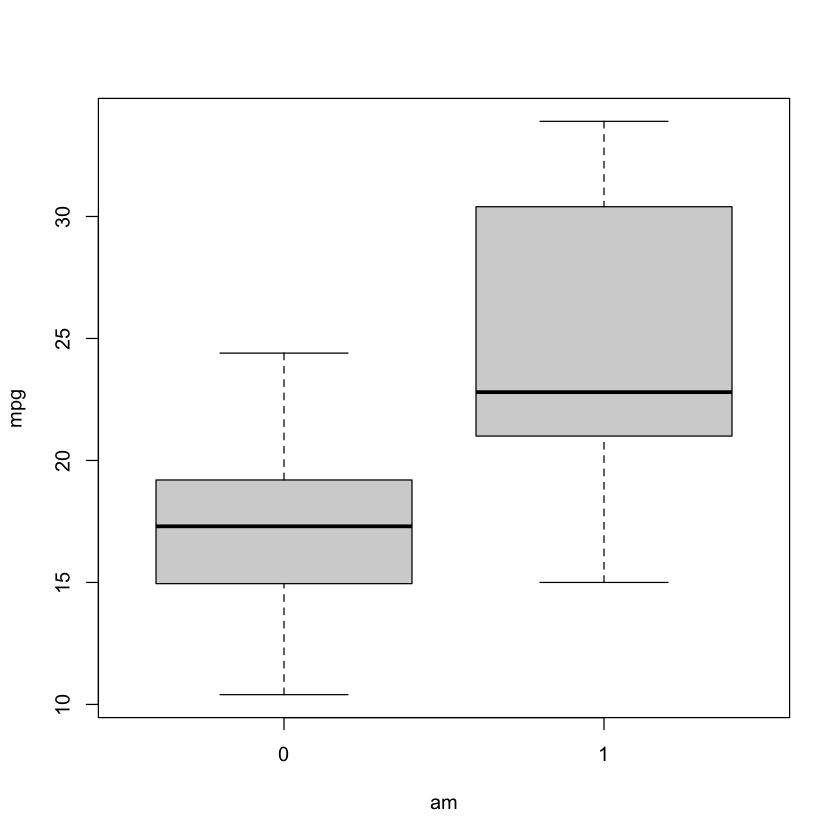

In [34]:
boxplot(mpg ~ am, data=mtcars) # Boxplot of mpg, group by am

# 5.7: Posterior Distribution of Mean Differences

<b>Highest Density Interval</b><br><br>
The Bayesian analysis shows that the “Highest Density Interval” or HDI ranges from -11.6 up to -2.84 (miles per gallon).<br>
This HDI has an intuitive interpretation: There is a 95% probability that the
population mean difference between the two groups falls within this range. The histogram on the previous slide shows that the most likely value is -7.22.<br>
These are statements about the posterior distribution of possible values of the mean difference.
<br><br><br>
<b>Confidence Interval</b><br><br>
From the analysis we conducted in Chapter 4, the 95 percent confidence interval ranged from -11.3 up to -3.2 (miles per gallon).<br>
Statisticians say that if we could replicate our whole study 100 times, on average in 95 of those replications the calculated confidence interval would contain the actual population mean difference.<br>
This is a statement about the long run possibilities, not about the accuracy of this particular confidence interval.

# 5.8: The Null Hypothesis Test

In [35]:
t.test(mtcars$mpg[ mtcars$am == 0 ], mtcars$mpg[ mtcars$am == 1])


	Welch Two Sample t-test

data:  mtcars$mpg[mtcars$am == 0] and mtcars$mpg[mtcars$am == 1]
t = -3.7671, df = 18.332, p-value = 0.001374
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -11.280194  -3.209684
sample estimates:
mean of x mean of y 
 17.14737  24.39231 


In [36]:
meanDiffs <- replicate(10000, 
                      mean(sample(mtcars$mpg[mtcars$am == 0], size=19, replace=TRUE)) 
                     - mean(sample(mtcars$mpg[mtcars$am == 1], size=13, replace=TRUE)))

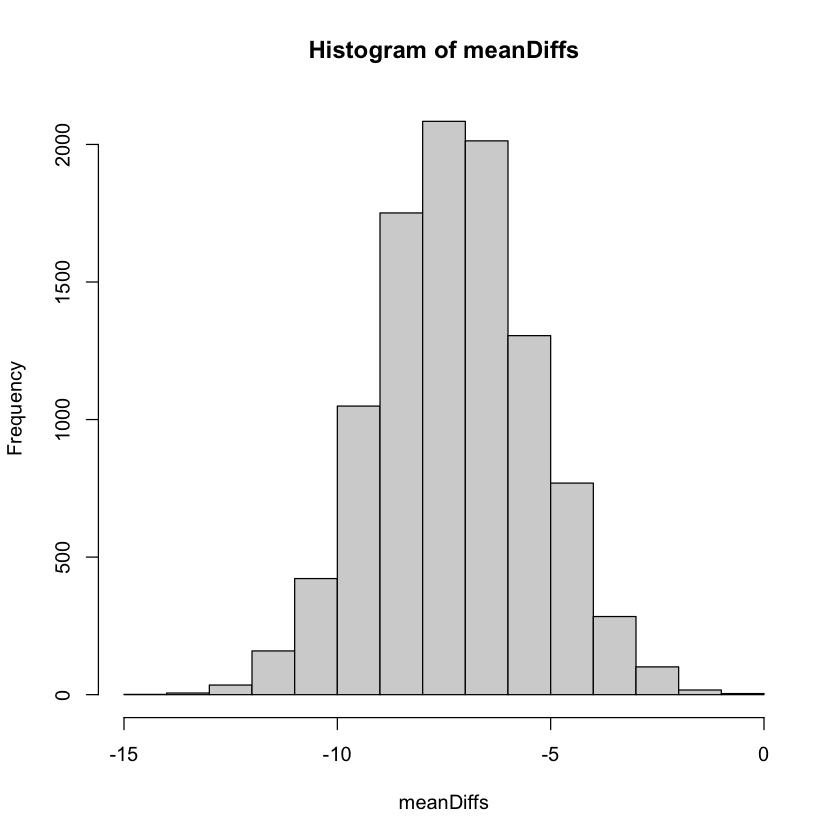

In [37]:
hist(meanDiffs)

# Fun with The rjags package

In [44]:
install.packages("BEST")
library("BEST")
carsBest <- BESTmcmc(mtcars$mpg[mtcars$am==0],
mtcars$mpg[mtcars$am==1]) 
plot(carsBest)

also installing the dependency ‘rjags’


Warning message in install.packages("BEST"):
“installation of package ‘rjags’ had non-zero exit status”
Warning message in install.packages("BEST"):
“installation of package ‘BEST’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



ERROR: Error in library("BEST"): there is no package called ‘BEST’


# 